In [1]:
# Titanic - Treino  
import pandas as pd
dados = pd.read_csv('***patch***/train.csv')
pd.set_option('display.max_columns',18)
pd.set_option('display.max_rows',300)

In [2]:
dados.head(100)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [3]:
dados.shape

(891, 12)

In [4]:
dados.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
faltantes = dados.isnull().sum()  
faltantes_percentual = (dados.isnull().sum()/len(dados['Sex']))*100
print(faltantes_percentual)
print("")
print(faltantes)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
[dados[c].value_counts() for c in list(dados.columns)]

[1      1
 599    1
 588    1
 589    1
 590    1
       ..
 301    1
 302    1
 303    1
 304    1
 891    1
 Name: PassengerId, Length: 891, dtype: int64,
 0    549
 1    342
 Name: Survived, dtype: int64,
 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64,
 Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
 Balkic, Mr. Cerin                                      1
 Isham, Miss. Ann Elizabeth                             1
 Caram, Mrs. Joseph (Maria Elias)                       1
 O'Sullivan, Miss. Bridget Mary                         1
                                                       ..
 Goodwin, Master. Sidney Leonard                        1
 Harrison, Mr. William                                  1
 Christy, Miss. Julie Rachel                            1
 Hamalainen, Mrs. William (Anna)                        1
 Mannion, Miss. Margareth                               1
 Name: Name, Length: 891, dtype: int64,
 male      577
 female    314
 Name: Sex, dtype: int64,

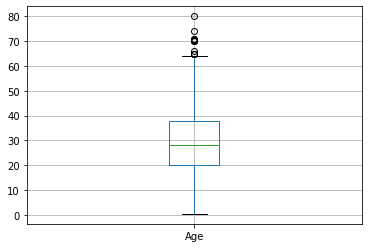

In [7]:
import matplotlib.pyplot as plt
dados.boxplot(column = ['Age'])
plt.show()

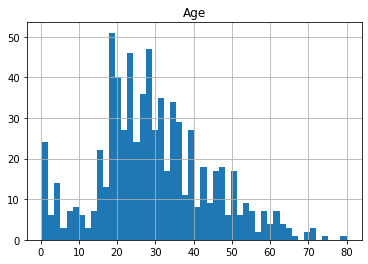

In [8]:
dados.hist(column = ['Age'], bins = 50)
plt.show()

In [9]:
# Retirando variáveis 
dados.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [10]:
# Enumerando variável
dados['Sex'] = dados['Sex'].replace('male', 0)
dados['Sex'] = dados['Sex'].replace('female', 1)
dados['Embarked'] = dados['Embarked'].replace('C', 0)
dados['Embarked'] = dados['Embarked'].replace('Q', 1)
dados['Embarked'] = dados['Embarked'].replace('S', 2)

In [11]:
# Complementando variável com a média
dados['Age'].fillna(dados['Age'].mean(), inplace = True)

In [12]:
faltantes = dados.isnull().sum()  
faltantes_percentual = (dados.isnull().sum()/len(dados['Sex']))*100
print(faltantes_percentual)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64


In [13]:
arquivo = dados.dropna()

In [14]:
faltantes = arquivo.isnull().sum()  
faltantes_percentual = (arquivo.isnull().sum()/len(dados['Sex']))*100
print(faltantes_percentual)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64


In [15]:
arquivo.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


In [16]:
# Definindo variáveis preditoras e variável target
y = arquivo['Survived']
x = arquivo.drop('Survived', axis = 1)

In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Normalizando as variáveis preditoras:
normalizador = MinMaxScaler(feature_range=(0,1))
x_norm = normalizador.fit_transform(x)

# Determinando os valores que serão testados no KNN:
valores_K = np.array([3, 7, 12])
calculo_distancia = ['minkowski', 'chebyshev']
valores_p = np.array([1, 2, 3, 4, 5, 6])
valores_grid = {'n_neighbors':valores_K, 'metric':calculo_distancia, 'p':valores_p}

# Criação do modelo:
modelo = KNeighborsClassifier()  

# Criando os grids:
gridKNN = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv=8)
gridKNN.fit(x_norm, y)

# Imprimindo os melhores parâmetros:
print('Melhor acurácia:', gridKNN.best_score_)
print('Melhor k:', gridKNN.best_estimator_.n_neighbors)
print('Método distância:', gridKNN.best_estimator_.metric)
print('Melhor valor p:', gridKNN.best_estimator_.p)


Melhor acurácia: 0.8144003378378379
Melhor k: 7
Método distância: minkowski
Melhor valor p: 2


In [18]:
from sklearn.cluster import KMeans
#criação do modelo :
modelo = KMeans(n_clusters = 2 ,random_state = 16)
modelo.fit(x_norm)

KMeans(n_clusters=2, random_state=16)

In [19]:
clusters = modelo.predict(x_norm)

In [20]:
from sklearn.metrics import accuracy_score
# imprimindo o resultado:
print(accuracy_score(y, clusters))

0.7862767154105736


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Separando os dados em folds
skfold = StratifiedKFold(n_splits = 8, random_state = 16, shuffle = True)

# Criação do Modelo
modelo = DecisionTreeClassifier()
resultado = cross_val_score(modelo,x,y,cv=skfold)

# Imprimindo a acurácia
print(resultado.mean())

0.8008667149292149


In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Criação do modelo:
modelo = ExtraTreesClassifier(n_estimators = 150, n_jobs = -1)
skfold = StratifiedKFold(n_splits = 8, shuffle = True)
resultado = cross_val_score(modelo, x, y, cv = skfold, n_jobs = -1)
print(resultado.mean())


0.7828688063063063


In [23]:
# importando funções 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# definindo os valores que serão testados em Logistic Regression
valores_C = np.array([0.03,0.05,0.07,0.1,2,3,5,10,20,50,100])
regularizacao = ['l1','l2']
valores_grid= {'C':valores_C, 'penalty':regularizacao}

# Criando o modelo:
modelo = LogisticRegression(solver='liblinear', max_iter=2000)  # tive que colocar estes 2 parâmetros para resolver uma msg de erro
                                                                # STOP: TOTAL N. of ITERATIONS REACHED LIMIT

# Criando os grids:
grid_regressao_logistica = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv=5)
grid_regressao_logistica.fit(x,y)

# Imprimindo a melhor acurácia e os melhores parâmtros
print('Melhor acurácia: ',grid_regressao_logistica.best_score_)
print('Parâmetro C: ',grid_regressao_logistica.best_estimator_.C)
print('Regularização :',grid_regressao_logistica.best_estimator_.penalty)

Melhor acurácia:  0.7964387735669397
Parâmetro C:  0.07
Regularização : l2


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Criação do modelo
modelo = GradientBoostingClassifier(n_estimators = 400)   
skfold = StratifiedKFold(n_splits = 10, random_state = 26, shuffle = True)
resultado = cross_val_score(modelo, x, y, cv=skfold, n_jobs = -1)
print(resultado.mean())



0.8358401430030643


In [25]:
modelo.fit(x,y)

GradientBoostingClassifier(n_estimators=400)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [27]:
clf = GradientBoostingClassifier(n_estimators=400, random_state = 26 ).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8052434456928839

In [28]:
y_predicted = clf.predict(x)

In [29]:
y_predicted.shape

(889,)

In [30]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [31]:
print(y_predicted)

[0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 

In [60]:
# Titanic - Teste 
# O melhor modelo foi GradientBoostingClassifier
# Agora será feita a predição nos dados novos, que não foram usados anteriormente
import pandas as pd
dados2 = pd.read_csv('***patch***/test.csv')
pd.set_option('display.max_columns',12)
pd.set_option('display.max_rows',300)

In [61]:
dados2.head(100)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [62]:
dados2.shape

(418, 11)

In [63]:
dados2.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
faltantes = dados2.isnull().sum()  
faltantes_percentual = (dados2.isnull().sum()/len(dados2['Sex']))*100
print(faltantes_percentual)
print("")
print(faltantes)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [65]:
# Retirando variáveis 
dados2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [66]:
# Enumerando variável
dados2['Sex'] = dados2['Sex'].replace('male', 0)
dados2['Sex'] = dados2['Sex'].replace('female', 1)
dados2['Embarked'] = dados2['Embarked'].replace('C', 0)
dados2['Embarked'] = dados2['Embarked'].replace('Q', 1)
dados2['Embarked'] = dados2['Embarked'].replace('S', 2)

In [67]:
# Complementando variável com a média
dados2['Age'].fillna(dados2['Age'].mean(), inplace = True)

In [68]:
dados2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [69]:
faltantes = dados2.isnull().sum()  
faltantes_percentual = (dados2.isnull().sum()/len(dados2['Sex']))*100
print(faltantes_percentual)

Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.239234
Embarked    0.000000
dtype: float64


In [70]:
dados2.shape

(418, 7)

In [71]:
arquivo = dados2.dropna()

In [72]:
arquivo.shape

(417, 7)

In [73]:
y_predicted = modelo.predict(arquivo)

In [74]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [76]:
y_predicted.shape

(417,)

In [96]:
# Importando o dataset para submissão

import pandas as pd
dados2 = pd.read_csv('***patch***/test.csv')
pd.set_option('display.max_columns',12)
pd.set_option('display.max_rows',300)

In [97]:
dados2.shape

(418, 11)

In [98]:
# Retirando variáveis 
dados2.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [99]:
# Enumerando variável
dados2['Sex'] = dados2['Sex'].replace('male', 0)
dados2['Sex'] = dados2['Sex'].replace('female', 1)
dados2['Embarked'] = dados2['Embarked'].replace('C', 0)
dados2['Embarked'] = dados2['Embarked'].replace('Q', 1)
dados2['Embarked'] = dados2['Embarked'].replace('S', 2)

In [100]:
# Complementando variável com a média
dados2['Age'].fillna(dados2['Age'].mean(), inplace = True)

In [101]:
dados2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


In [102]:
faltantes = dados2.isnull().sum()  
faltantes_percentual = (dados2.isnull().sum()/len(dados2['Sex']))*100
print(faltantes_percentual)

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Fare           0.239234
Embarked       0.000000
dtype: float64


In [103]:
arquivo = dados2.dropna()

In [104]:
arquivo.shape

(417, 8)

In [105]:
arquivo.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


In [106]:
submission = pd.DataFrame({"PassengerId": arquivo['PassengerId'], "Survived": y_predicted})

In [108]:
submission.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [109]:
submission.to_csv('titanic_submission.csv', index=False)